# 自适应线性神经网络 Adaptive Liner Neuron

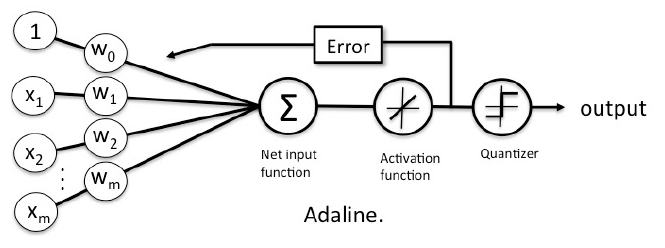

### 代价函数
通过模型得到的输出与世纪类标之间的误差平方和
$$ J(w)=\frac{1}{2}\sum_{i}(y^{(i)}-\phi(z^{(i)}))^2 $$

### 权重更新
![image.png](http://ww4.sinaimg.cn/mw690/6941baebjw1er4a2oiqr7j20iw0cgq3g.jpg)

梯度相反方向是学习速率最快方向，权重增量为负梯度学习速率的乘积
$$ \Delta{w}=-\eta\Delta{J}(w) $$

其中每个权重w的偏导为
$$ \frac{\partial{J}}{\partial{w}_{j}}=\sum_{i}(y^{(i)}-\phi(z^{(i)}))(-{x}_{j}^{(i)}) $$

所以权重增量可以写为
$$ \Delta{w}_{j}=\eta\sum_{i}(y^{(i)}-\phi(z^{(i)})){x}_{j}^{(i)} $$

In [1]:
import numpy as np
from matplotlib import pyplot as plt

class Adaline:
    """自适应线性神经网络

    :param
        eta: float 学习步长，在0到1之间
        iter: int 迭代次数

    :arg
        w: array 权重向量，由目标函数的各特征系数组成，含一个常数项，所以长度为 特征数+1
        errors: list 每次迭代，预测值与实际值不符的样本个数
    """

    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        """fit训练

        :param
            X: n*m-matrix 样本矩阵，行n为样本数，列m为特征数
            y: array 分类向量， 由分类标签（即-1或1)组成，长度为样本数

        :return
            self: object
        """
        # 创建一个空列表用以记录每次J(w)
        self.costs = list()

        # 创建一个维数比特征数多一的零向量，最后一项为常数项
        self.w = np.zeros(X.shape[1] + 1)

        # 迭代n_iter次
        for each_time in range(self.n_iter):
            # 批量梯度下降更新权重
            errors = (y - self.net_input(X))
            self.w[:-1] += self.eta * np.dot(X.T, errors)
            self.w[-1] += self.eta * errors.sum()
            # 代价函数值
            cost = 0.5 * np.square(errors).sum()
            self.costs.append(cost)

        return self

    def net_input(self, X):
        """净输入函数

        :param
            X: matrix 样本矩阵，一行为一条样本，每列代表一个特征

        :return:
            z: array 每条样本x与w的线性组合值组成的向量
        """
        z = np.dot(X, self.w[:-1]) + self.w[-1]
        return z

    def activation(self, X):
        """激励函数

        :param
            X: matrix 样本矩阵，一行为一条样本，每列代表一个特征

        :return:
            z: array 每条样本x与w的线性组合值组成的向量
        """
        # 简单的恒等函数
        z = self.net_input(X)
        return z

    def predict(self, X):
        """量化器

        :param
            X: matrix 样本矩阵，一行为一条样本，每列代表一个特征

        :return:
            y_predict: int 分类预测值 1或-1
        """
        theta = 0.0
        y_predict = np.where(self.activation(X) >= theta, 1, -1)
        return y_predict

    def err_plot(self):
        plt.plot(range(len(self.costs)), self.costs)
        plt.xlabel('n_iter')
        plt.ylabel('costs')
        plt.show()

## 测试

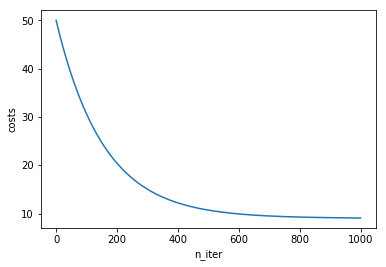

权重系数为：[-0.77658907  1.3110747   0.18151543]


In [2]:
from sklearn.datasets import load_iris

# 样本0-49类标为0，50-99类标为1，100-149类标为2
# 所以只选前100个样本，并将类标转换为1和-1
# 为了可视化方便，只选两个特征
X, y = load_iris(return_X_y=True)
X = X[:100, :2]
y = y[:100]
y = np.where(y == 0, 1, -1)

ada = Adaline(eta=0.0001, n_iter=1000)
ada.fit(X, y)
ada.err_plot()
print(f'权重系数为：{ada.w}')

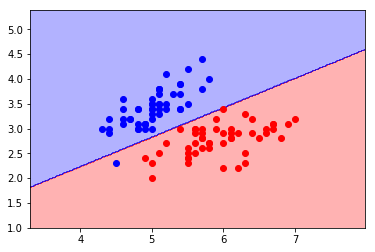

In [3]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y ,classifier, resolution=0.02):
    # np.unique(y) 表示y种类数
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # 横轴、纵轴范围
    x1_min, x1_max = X[:,0].min()-1, X[:,0].max()+1
    x2_min, x2_max = X[:,1].min()-1, X[:,1].max()+1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    
    # 把x1_min,x1_max,x2_min,x2_max围合的矩形类所用点用感知器分类， 并根据分类用contourf填色
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    
    # 遍历每个类别
    for idx, cl in enumerate(np.unique(y)):
        # 当前类别中，横坐标为特征0， 纵坐标为特征1, 根据类别控制点的颜色
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], c=cmap(cl), label=cl)
    
    plt.show()

plot_decision_regions(X, y, classifier=ada)